In [758]:
from helper_funcs import *

# Colourblind friendly colours
import tol_colors as tc
cset = tc.tol_cset('bright')
plt.rc('axes', prop_cycle=plt.cycler('color', list(cset)))

fsize = 24
plt.rcParams.update({'font.size': fsize})


dynamics_path = '../publication/dynamics/'
static_path = '../publication/static_tests/'

tmap = {
    'npt_000conEC_298K':'EMC (298$\,$K)',
    'npt_033conEC_298K':'EC:EMC (3:7) (298$\,$K)',
    'npt_066conEC_298K':'EC:EMC (7:3) (298$\,$K)',
    'npt_100conEC_313K':'EC (313$\,$K)',
}

conmap = {
    '000conEC':'EMC (298$\,$K)',
    '033conEC':'EC:EMC (3:7) (298$\,$K)',
    '066conEC':'EC:EMC (7:3) (298$\,$K)',
    '100conEC':'EC (313$\,$K)',
}

In [759]:
tags = [
    'SDN22NQQ/wB97X/SEED1/DSET1',
    'SDN22NQQ/wB97X/SEED1/DSET2',
    'SDN22NQQ/wB97X/SEED1/DSET3',
    'SDN22NQQ/wB97X/SEED2/DSET1',
    'SDN22NQQ/wB97X/SEED3/DSET1',
    'SDN22NQ/wB97X/SEED1/DSET1',
    'SDN22NQ/wB97X/SEED1/DSET2',
    'SDN22NQ/wB97X/SEED1/DSET3',
    'SDN22NQ/wB97X/SEED2/DSET1',
    'SDN22NQ/wB97X/SEED3/DSET1',
    'SDN22N/wB97X/SEED1/DSET1',
    'SDN22N/wB97X/SEED2/DSET1',
    'SDN22N/wB97X/SEED3/DSET1',
] # These tags needs to be adjusted to be compliant with zenodo

# Data set statistics

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from aseMolec import anaAtoms as aa
from ase.io import read

SD22NQQ = read(f'{static_path}/SDN22NQQ/wB97X/SEED1/DSET1/train_data/SD22NQQ1_wB97XD3BJ_Psi4.xyz', ':')
SD22NQ = read(f'{static_path}/SDN22NQ/wB97X/SEED1/DSET1/train_data/SD22NQ1_wB97XD3BJ_Psi4.xyz', ':')
SD22N = read(f'{static_path}/SDN22N/wB97X/SEED1/DSET1/train_data/SD22N_wB97XD3BJ_Psi4.xyz', ':')

stats_SD2N   = np.histogram(np.array([at.info['Nmols'] for at in SD22N]), [1,2,3,4,5,6,7])[0]
stats_SD2NQ  = np.histogram(np.array([at.info['Nmols'] for at in SD22NQ]), [1,2,3,4,5,6,7])[0]
stats_SD2NQQ = np.histogram(np.array([at.info['Nmols'] for at in SD22NQQ]), [1,2,3,4,5,6,7])[0]

In [34]:
try:
    stats_df = pd.read_pickle("./cluster_stats.pkl")
except:
    stats_dict = {'SD22N':stats_SD2N, 'SD22NQ':stats_SD2NQ, 'SD22NQQ':stats_SD2NQQ}
    stats_df = pd.DataFrame(stats_dict)#.index.name('Cluster size')
    stats_df.index.name = 'Cluster size, $N_\\text{mols}$'
    stats_df.index += 1
    pd.to_pickle(stats_df, "./cluster_stats.pkl")
stats_df

,SD22N,SD22NQ,SD22NQQ
"Cluster size, $N_\text{mols}$",,,
1,77880,7880,900
2,82253,18253,1470
3,37176,10176,2001
4,17787,4787,1917
5,6464,1464,1464
6,264,264,264


In [ ]:
tot = stats_df.aggregate('sum', axis=0)
stats_dist_df = stats_df/tot
clusters = np.arange(1, len(stats_dist_df)+1)
print(clusters)
expectation = (stats_dist_df*clusters[:,None]).aggregate('sum', axis=0).round(decimals=1)
print(expectation)
SD22N_cluster_size, SD22NQ_cluster_size, SD22NQQ_cluster_size = expectation

stats_dist_df

[1 2 3 4 5 6]
SD22N      2.1
SD22NQ     2.4
SD22NQQ    3.3
dtype: float64


,SD22N,SD22NQ,SD22NQQ
"Cluster size, $N_\text{mols}$",,,
1,0.351089,0.184009,0.112275
2,0.370803,0.426233,0.183383
3,0.167592,0.237624,0.249626
4,0.080185,0.111783,0.239147
5,0.029140,0.034186,0.182635
6,0.001190,0.006165,0.032934


In [ ]:
try:
    SD22N_comp_flat = pd.read_pickle("./SD22N_stats.pkl")
except:
    SD22N = read(f'{static_path}/SDN22N/wB97X/SEED1/DSET1/train_data/SD22N_wB97XD3BJ_Psi4.xyz', ':')
    SD22N_comp = collect_comp(SD22N)
    SD22N_comp_flat = flatten_comp(SD22N_comp)
    pd.to_pickle(SD22N_comp_flat, "./SD22N_stats.pkl")
SD22N_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,887,72354,0,0,4639
2,1069,40190,1092,9088,30814
3,178,23091,516,2433,10958
4,41,11528,189,706,5323
5,25,5322,139,344,634
6,0,0,144,110,10


In [78]:
try:
    SD22NQ_comp_flat = pd.read_pickle("./SD22NQ_stats.pkl")
except:
    SD22NQ = read(f'{static_path}/SDN22NQ/wB97X/SEED1/DSET1/train_data/SD22NQ1_wB97XD3BJ_Psi4.xyz', ':')
    SD22NQ_comp = collect_comp(SD22NQ)
    SD22NQ_comp_flat = flatten_comp(SD22NQ_comp)
    pd.to_pickle(SD22NQ_comp_flat, "./SD22NQ_stats.pkl")
SD22NQ_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,887,2354,0,0,4639
2,1069,190,1092,9088,6814
3,178,1091,516,2433,5958
4,41,1528,189,706,2323
5,25,322,139,344,634
6,0,0,144,110,10


In [ ]:
try:
    SD22NQQ_comp_flat = pd.read_pickle("./SD22NQQ_stats.pkl")
except:
    SD22NQQ = read(f'{static_path}/SDN22NQQ/wB97X/SEED1/DSET1/train_data/SD22NQQ1_wB97XD3BJ_Psi4.xyz', ':')
    SD22NQQ_comp = collect_comp(SD22NQQ)
    SD22NQQ_comp_flat = flatten_comp(SD22NQQ_comp)
    pd.to_pickle(SD22NQQ_comp_flat, "./SD22NQQ_stats.pkl")
SD22NQQ_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,150,150,0,0,600
2,70,70,70,560,700
3,40,40,220,1073,628
4,41,200,189,706,781
5,25,322,139,344,634
6,0,0,144,110,10


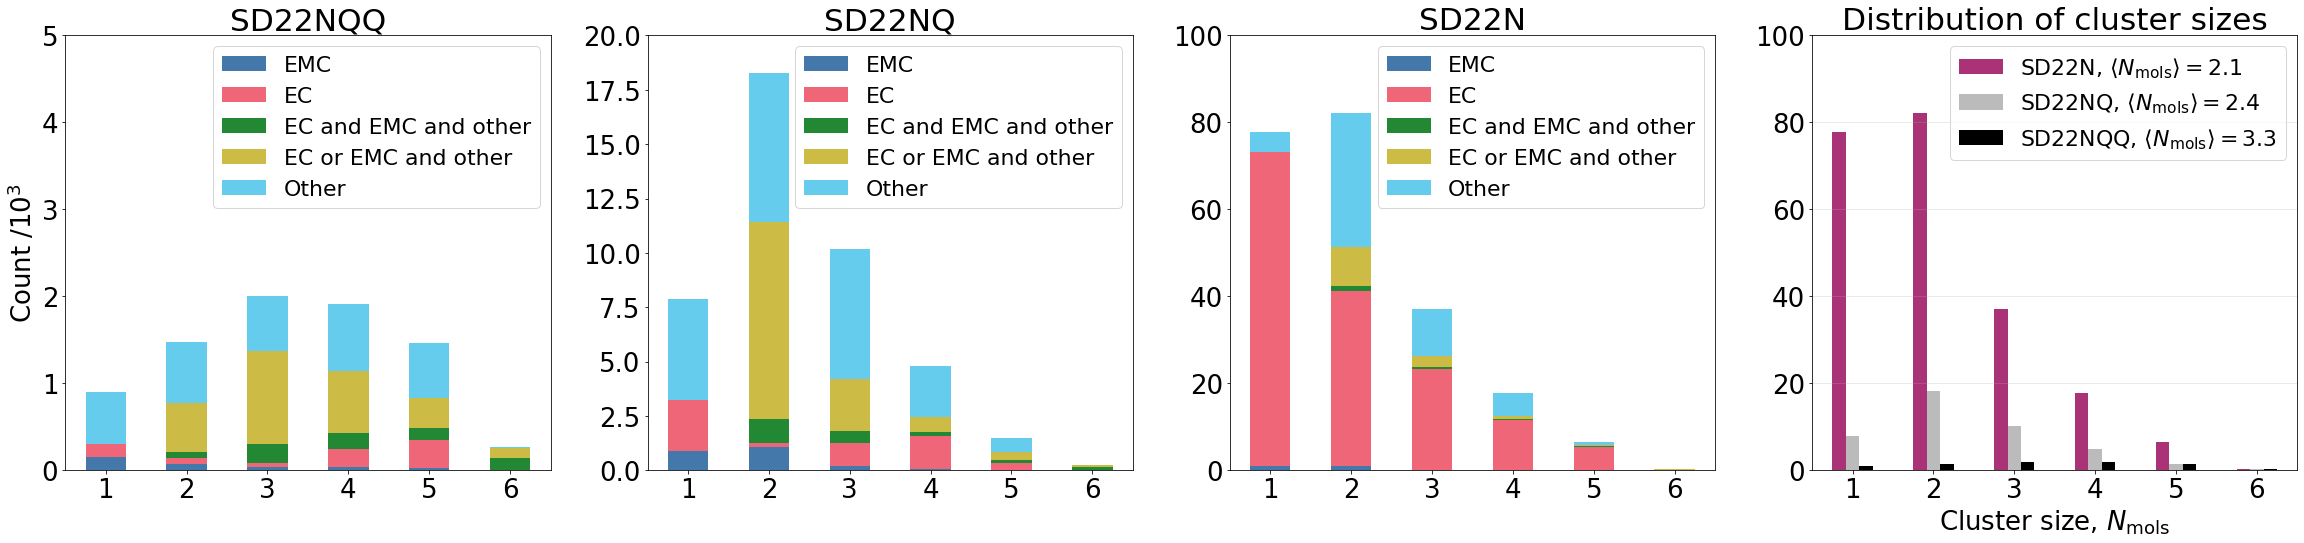

In [295]:
fsize = 26
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(1,4, figsize=(10*4, 8*1), sharey=False)
comps = {
    'SD22NQQ':SD22NQQ_comp_flat,
    'SD22NQ':SD22NQ_comp_flat,
    'SD22N':SD22N_comp_flat,
}
for i, (ax, (name, data)) in enumerate(zip(axs, comps.items())):
    d = data/1e3
    if i == 0:
        ax.set_ylim([0,5])
    elif i == 1:
        ax.set_ylim([0,20])
    elif i == 2:
        ax.set_ylim([0,100])


    d.plot.bar(ax=ax, legend=False, stacked=True, rot=0)
    #ax.set_yscale('log')
    ax.legend(fontsize=fsize-4, ncols=1)
    ax.set_title(name)
axs[0].set_ylabel('Count /$10^3$')

axs[-1].set_title('Distribution of cluster sizes')
scaled_stats_df = stats_df/1e3
scaled_stats_df.plot.bar(
#stats_df.plot.bar(
    #ylabel='Count /$10^4$',
	rot=0,
	ax=axs[-1],
    color=cset[5:],
)
axs[-1].set_ylim([0,100])

axs[-1].grid(axis='y', alpha=0.3)
axs[-1].legend(
    [
        f'SD22N, $\\langle N_\\text{{mols}} \\rangle = {SD22N_cluster_size}$',
        f'SD22NQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQ_cluster_size}$',
        f'SD22NQQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQQ_cluster_size}$',
    ],
    fontsize=fsize-4,
)

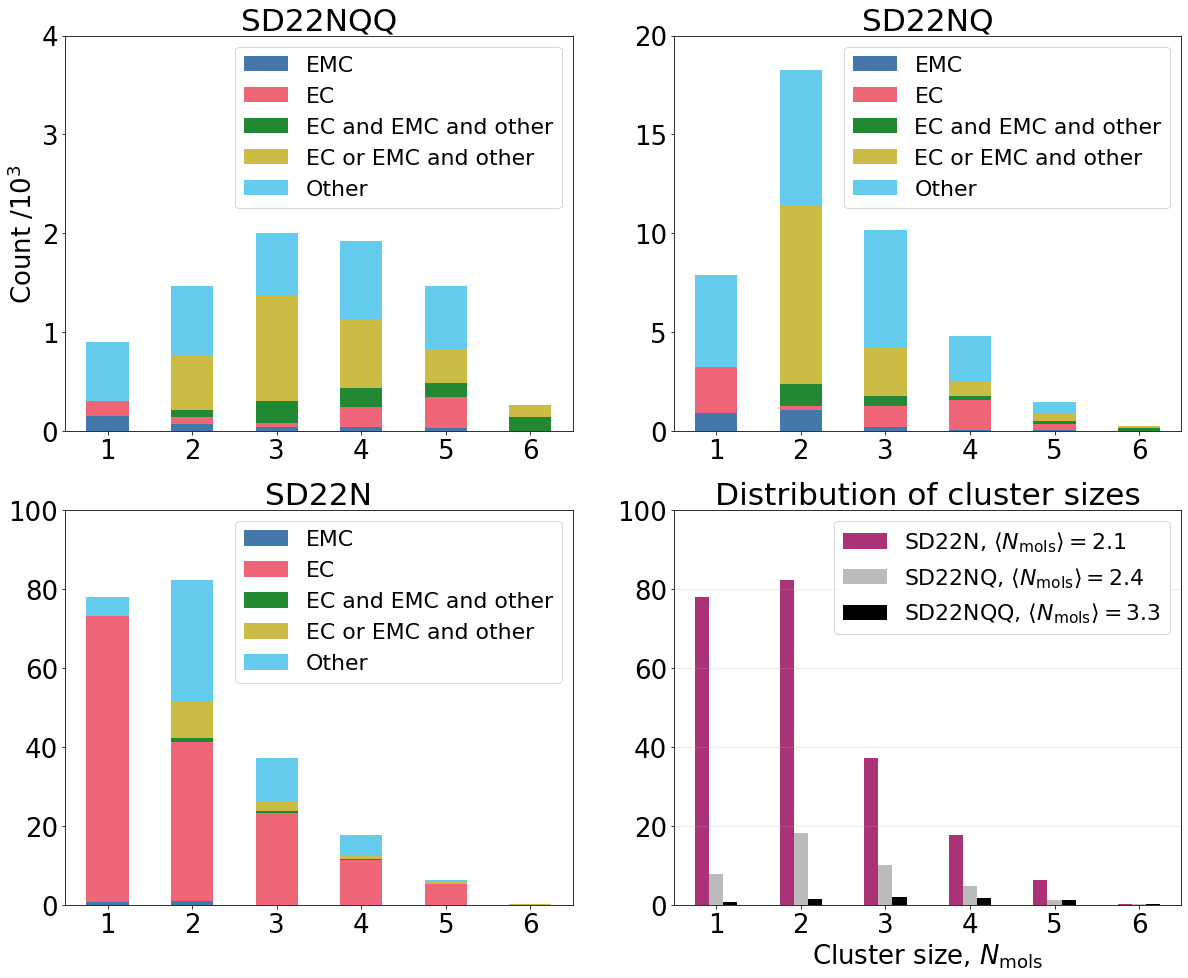

In [296]:
fsize = 26
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,2, figsize=(10*2, 8*2), sharey=False)
comps = {
    'SD22NQQ':SD22NQQ_comp_flat,
    'SD22NQ':SD22NQ_comp_flat,
    'SD22N':SD22N_comp_flat,
}
axs = axs.ravel()
for i, (ax, (name, data)) in enumerate(zip(axs, comps.items())):
    d = data/1e3
    if i == 0:
        ax.set_ylim([0,4])
    elif i == 1:
        ax.set_ylim([0,20])
    else:
        ax.set_ylim([0,100])

    d.plot.bar(ax=ax, legend=False, stacked=True, rot=0)
    #ax.set_yscale('log')
    ax.legend(fontsize=fsize-4, ncols=1)
    ax.set_title(name)

axs[0].set_ylabel('Count /$10^3$')

axs[-1].set_title('Distribution of cluster sizes')
scaled_stats_df = stats_df/1e3
scaled_stats_df.plot.bar(
#stats_df.plot.bar(
    #ylabel='Count /$10^4$',
	rot=0,
	ax=axs[-1],
    color=cset[5:],
)
axs[-1].set_ylim([0,100])

axs[-1].grid(axis='y', alpha=0.3)
axs[-1].legend(
    [
        f'SD22N, $\\langle N_\\text{{mols}} \\rangle = {SD22N_cluster_size}$',
        f'SD22NQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQ_cluster_size}$',
        f'SD22NQQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQQ_cluster_size}$',
    ],
    fontsize=fsize-4,
)

# NPT dynamics, part A

In [760]:
thermo = dict()
for tag in tags:
    thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

## Determining diffusion limit start times
### Taken from *Best Practices for Computing Transport Properties 1. Self-Diffusivity and Viscosity from Equilibrium Molecular Dynamics [Article v1.0]*
#### 5.2.3 Data analysis
In order to obtain reliable estimates of D, it is important to consider how the linear regression is performed for the MSD with respect to time (Equation 2). Specifically, the time interval that is included in the regression can have a significant impact on the predicted value of D. We recommend that only the “middle” of the MSD be used in the fit to approximate the long-time slope. Short time must be excluded as it follows a ballistic trajectory, while very long time is excluded due to the increased noise. **Currently, we are unaware of an objective approach for defining the “middle” region. Until such an approach exists, we recommend that the author reports how the region was selected and how much variability in D can be attributed to the choice of this region**. In addition, the uncertainty in the fit of the slope should be reported.

A typical log-log plot, borrowed from Ref. [36], is provided in Figure 2, where the linear regression to the “middle” region is included. From visual inspection, the “ballistic” short-time interval ranges from the beginning of the simulation to approximately 100 ps. **The “middle” region is identified by the linear regime with a slope of 1 (for a log-log plot)** spanning from approximately 100 ps to 1000 ps. Note that the noisy “long-time” simulation data (beyond 1000 ps) are not depicted in Figure 2 and are excluded from the linear fit.

In [714]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=5e-2, window=1000, start_id=5000)
        
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.05
8569 99997 0.5792835102834976 3.523789264967307e-10 1.1418381860107642e-12 0.9931064235282503
Using slope error thresold of: 0.05
7852 99999 0.37425833669408903 2.4616712222205464e-10 1.1857177462795398e-12 0.9847769353065063
Using slope error thresold of: 0.05
7831 99999 0.6271087307506688 2.248258380350345e-10 1.382514232140683e-12 0.9754190500298494
Using slope error thresold of: 0.05
9452 99998 0.6769647451024068 1.7756130827682575e-10 9.220906484494131e-13 0.9826500265118853
Using slope error thresold of: 0.05
8781 81083 0.5876620831920589 2.608974028091364e-10 2.416260049868334e-12 0.9570836474156286
Using slope error thresold of: 0.05
7731 81941 0.3823446990223095 3.2100094413852355e-10 2.130329296815549e-12 0.9769126300684835
Using slope error thresold of: 0.05
6821 82071 0.6599966496675886 1.373212826631727e-10 8.533006557604187e-13 0.9794230462119315
Using slope error thresold of: 0.05
7617 84271 0.4607112408194169 2.3474830280841654e-10 1.

- Yellow: Below 0.95
- Orange: Below 0.90
- Red: Below 0.80

In [715]:
df, dunit = get_density(tags, dynamics_path, std=True)
df['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
#df['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]]
df['Diff. fit error'] = [e*1e10 for e in diff_errs] # 1e-6 cm2/s
df['log-log r2'] = log_r2
df['Diff. r2'] = diff_r2
df['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
df.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

{'SDN22NQQ/wB97X/SEED1/DSET1': {'npt_000conEC_298K': 1.1337065558566757, 'npt_033conEC_298K': 1.2050099289692897, 'npt_066conEC_298K': 1.2836995489654894, 'npt_100conEC_313K': 1.3790884983199663}, 'SDN22NQQ/wB97X/SEED1/DSET2': {'npt_000conEC_298K': 1.131116972608315, 'npt_033conEC_298K': 1.201672038918246, 'npt_066conEC_298K': 1.292895771319955, 'npt_100conEC_313K': 1.384449390217275}, 'SDN22NQQ/wB97X/SEED1/DSET3': {'npt_000conEC_298K': 1.1172594603746038, 'npt_033conEC_298K': 1.1832447912479125, 'npt_066conEC_298K': 1.2524597504475043, 'npt_100conEC_313K': 1.3366775966859668}, 'SDN22NQQ/wB97X/SEED2/DSET1': {'npt_000conEC_298K': 1.0470079695896959, 'npt_033conEC_298K': 1.1166594532945329, 'npt_066conEC_298K': 1.2038802387223873, 'npt_100conEC_313K': 1.3004342627526273}, 'SDN22NQQ/wB97X/SEED3/DSET1': {'npt_000conEC_298K': 1.304436416884169, 'npt_033conEC_298K': 1.3521774707747078, 'npt_066conEC_298K': 1.4013652784227841, 'npt_100conEC_313K': 1.4514875637556377}, 'SDN22NQ/wB97X/SEED1/DSE

/tmp/ipykernel_159951/140056054.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])


,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,wB97X,1,1,"EMC (298$\,$K)",1.133707,0.015552,3.523789,0.011418,0.579284,0.993106,0.085690
1,SDN22NQQ,wB97X,1,1,"EC:EMC (3:7) (298$\,$K)",1.205010,0.015673,2.461671,0.011857,0.374258,0.984777,0.078520
2,SDN22NQQ,wB97X,1,1,"EC:EMC (7:3) (298$\,$K)",1.283700,0.016119,2.248258,0.013825,0.627109,0.975419,0.078310
3,SDN22NQQ,wB97X,1,1,"EC (313$\,$K)",1.379088,0.016214,1.775613,0.009221,0.676965,0.982650,0.094520
4,SDN22NQQ,wB97X,1,2,"EMC (298$\,$K)",1.131117,0.016579,2.608974,0.024163,0.587662,0.957084,0.087810
5,SDN22NQQ,wB97X,1,2,"EC:EMC (3:7) (298$\,$K)",1.201672,0.014779,3.210009,0.021303,0.382345,0.976913,0.077310
6,SDN22NQQ,wB97X,1,2,"EC:EMC (7:3) (298$\,$K)",1.292896,0.016199,1.373213,0.008533,0.659997,0.979423,0.068210
7,SDN22NQQ,wB97X,1,2,"EC (313$\,$K)",1.384449,0.016043,2.347483,0.013000,0.460711,0.983287,0.076170
8,SDN22NQQ,wB97X,1,3,"EMC (298$\,$K)",1.117259,0.016536,4.338540,0.023567,0.522030,0.980993,0.091880
9,SDN22NQQ,wB97X,1,3,"EC:EMC (3:7) (298$\,$K)",1.183245,0.016968,2.746772,0.019429,0.550767,0.968329,0.095920


## Results

### Density

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


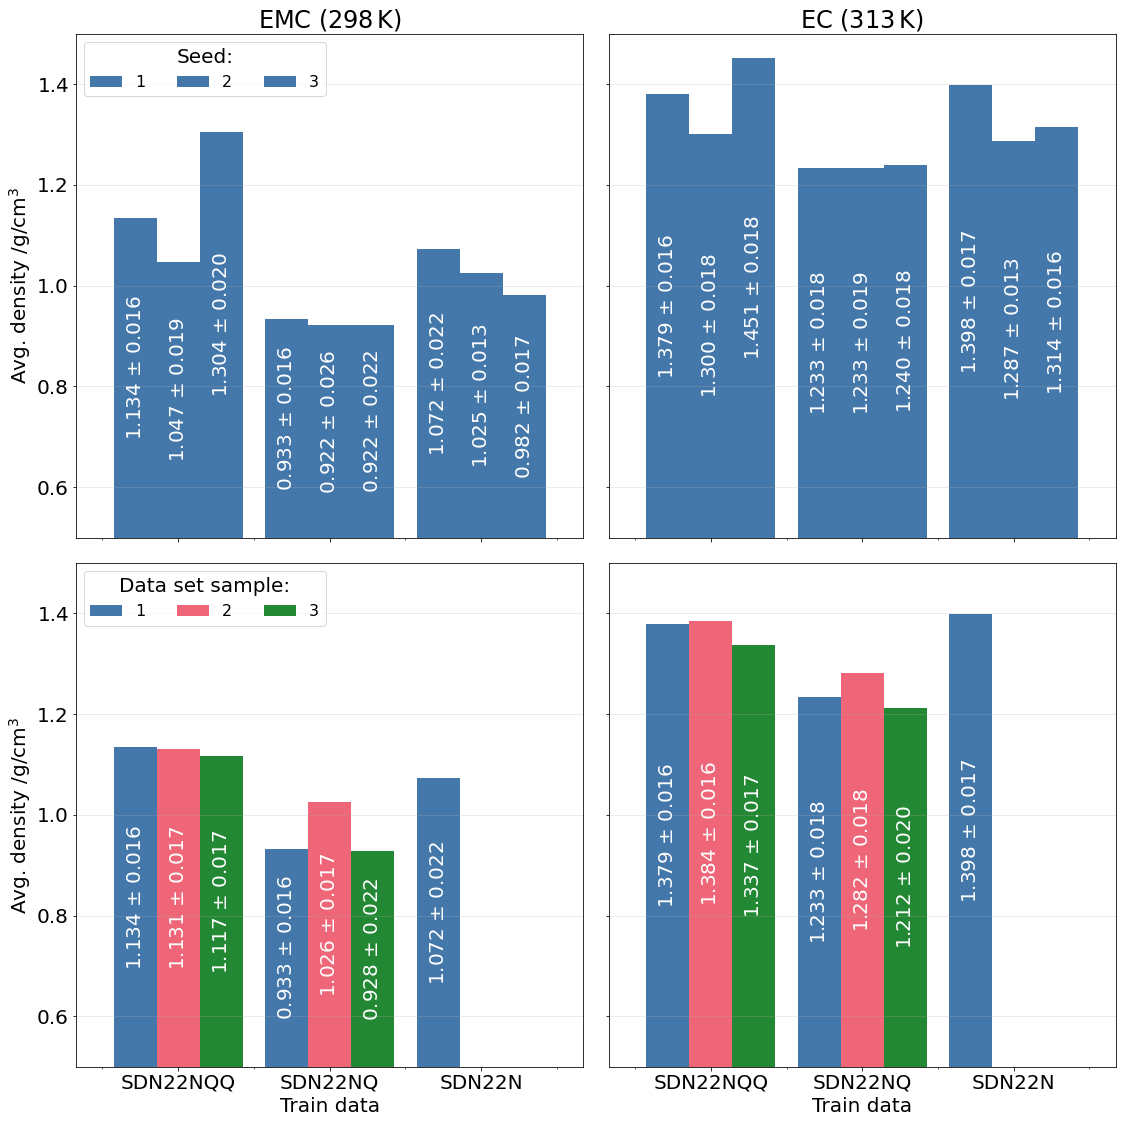

In [717]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = df['Composition'] == comps[0]
EC_mask = df['Composition'] == comps[-1]
EC_EMC_df = df[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    ).sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    ).sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset[0],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize)

    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    ).sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    ).sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset,
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

axs[0,0].legend(title='Seed:', ncols=3, loc='upper left', fontsize=fsize-4)
axs[1,0].legend(title='Data set sample:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()

### Diffusivity

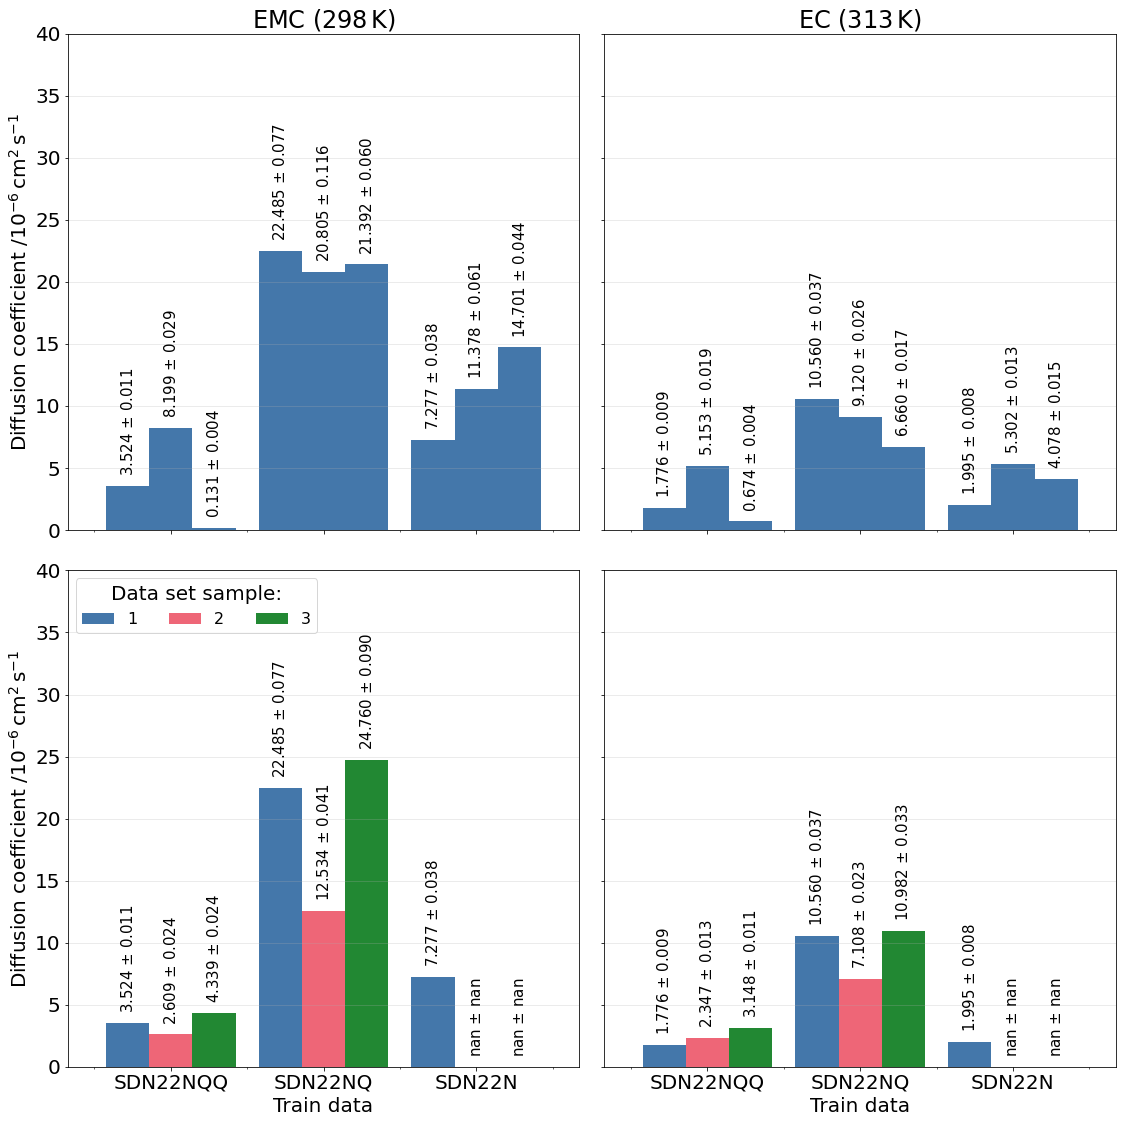

In [763]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = df['Composition'] == comps[0]
EC_mask = df['Composition'] == comps[-1]
EC_EMC_df = df[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    k = 1
    D_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=False)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,40],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        color=cset[0],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
CSET = [cset[0]]+list(cset[3:])
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=False)#[order]
    a1 = D_g.plot.bar(
        ylim=[0,40],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        color=cset,
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

#axs[0,0].legend(title='Seed:', ncols=3, loc='upper left', fontsize=fsize-4)
axs[1,0].legend(title='Data set sample:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()

In [764]:
drop_list = ['Seed', 'Sample', 'log-log r2', 'Diff. r2']
SD22NQ_wB97_df = reduce_df(df[df['Train data'] == 'SDN22NQ'], drop_list)
SD22NQ_wB97_df

,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,Diff. start time /ns
0,"EC (313$\,$K)",1.239912,0.008359,8.885928,0.012578,0.098246
1,"EC:EMC (3:7) (298$\,$K)",1.032804,0.009197,13.314410,0.023564,0.117378
2,"EC:EMC (7:3) (298$\,$K)",1.130835,0.008155,9.827120,0.013814,0.090218
3,"EMC (298$\,$K)",0.946189,0.009395,20.394952,0.036250,0.105466


### Intermolecular radial distributions

In [ ]:
rdfs, number_densities = eval_rdfs(tags, dynamics_path)

with open('./part3a_rdfs.pkl', 'wb') as f:
    pickle.dump(rdfs, f)

with open('./part3a_rhos.pkl', 'wb') as f:
    pickle.dump(number_densities, f)

In [ ]:
with open('./part3a_rdfs.pkl', 'rb') as f:
    rdfs = pickle.load(f)

with open('./part3a_rhos.pkl', 'rb') as f:
    number_densities = pickle.load(f)

Data set 1

In [ ]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, rdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        if dset == 'DSET1':
            for seed,comps in seeds.items():
                if seed == 'SEED1':
                    #print(seed)
                    for comp, (g, r) in comps.items():
                        #print(comp)
                        id0 = np.where(r>rstart)[0][0]
                        #print(id0, r[id0])
                        
                        idhi = id0+id_width
                        rmin = min(r[id0:idhi])
                        idx = np.argmin(g[id0:idhi])
                        #print(idx, r[idx])

                        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                        ax.plot(r, g, label=comp, color=get_colour(comp))
                        ax.legend(fontsize=fsize-8)
                        
                        train_data, functional = model.split('_')
                        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

Data set 2

In [ ]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, rdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        if dset == 'DSET2':
            for seed,comps in seeds.items():
                if seed == 'SEED1':
                    #print(seed)
                    for comp, (g, r) in comps.items():
                        #print(comp)
                        id0 = np.where(r>rstart)[0][0]
                        #print(id0, r[id0])
                        
                        idhi = id0+id_width
                        rmin = min(r[id0:idhi])
                        idx = np.argmin(g[id0:idhi])
                        #print(idx, r[idx])

                        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                        ax.plot(r, g, label=comp, color=get_colour(comp))
                        ax.legend(fontsize=fsize-8)
                        
                        train_data, functional = model.split('_')
                        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

Data set 3

In [ ]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, rdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        if dset == 'DSET3':
            for seed,comps in seeds.items():
                if seed == 'SEED1':
                    #print(seed)
                    for comp, (g, r) in comps.items():
                        #print(comp)
                        id0 = np.where(r>rstart)[0][0]
                        #print(id0, r[id0])
                        
                        idhi = id0+id_width
                        rmin = min(r[id0:idhi])
                        idx = np.argmin(g[id0:idhi])
                        #print(idx, r[idx])

                        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                        ax.plot(r, g, label=comp, color=get_colour(comp))
                        ax.legend(fontsize=fsize-8)
                        
                        train_data, functional = model.split('_')
                        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

# NPT dynamics, part B

In [767]:
def get_start_index(time, msd, threshold, window=10, start_id=0):
    window = int(window)
    start_id = int(start_id)
    print(f'Using slope error thresold of: {threshold}')
    time = time[start_id:]
    for i, t in enumerate(time):
        if i > window:
            
            slope, intercept, err, r2 = get_slope(np.log(time[i-window:i]),np.log(msd[i-window:i]))
            if abs(slope-1) < threshold:
                idx = start_id+i
                break
            else:
                idx = None
    
    return idx, r2

In [765]:
tags = [
    'SDN22NQ/B97/SEED1/DSET1',
    'SDN22NQ/B97/SEED1/DSET2',
    'SDN22NQ/B97/SEED1/DSET3',
    #'SDN22NQ/B97/SEED2/DSET1', # this is missing, locally (Sams) only 100%EMC?
    #'SDN22NQ/B97/SEED3/DSET1', # this is missing, locally (Sams) only 100%EMC?
] # These tags needs to be adjusted to be compliant with zenodo

thermo = dict()
for tag in tags:
    thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

In [768]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        #idx, r2 = get_start_index(time,msd,threshold=1e-2, min_steps=5e3)
        idx, r2 = get_start_index(time,msd,threshold=5e-2, window=1000, start_id=5000)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.05
9315 99997 0.6765208932781419 8.080069470071535e-10 2.8089550561896553e-12 0.9921380059115615
Using slope error thresold of: 0.05
7803 99999 0.633108795865751 3.9035033498248124e-10 1.3723543423421998e-12 0.9918275523123995
Using slope error thresold of: 0.05
8418 99999 0.4721438924030413 3.626508487414085e-10 1.4703132850934502e-12 0.9892322155868969
Using slope error thresold of: 0.05
10900 99998 0.5721264538169122 4.0922842892680194e-10 2.0309299711020803e-12 0.9843804326188229
Using slope error thresold of: 0.05
12783 99999 0.3175968325601554 3.2642732762470845e-09 1.408024618698129e-11 0.9884027006029174
Using slope error thresold of: 0.05
8737 99999 0.6737738585434994 2.022130155873964e-09 7.0561563650361956e-12 0.9920289999751344
Using slope error thresold of: 0.05
10598 99999 0.578576772907058 1.719214486556105e-09 4.295596664789267e-12 0.9959806116297587
Using slope error thresold of: 0.05
6903 99999 0.5532763850017437 1.5992195896927157e-09

In [769]:
bf, dunit = get_density(tags, dynamics_path, std=True)
bf['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
#df['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]]
bf['Diff. fit error'] = [e*1e10 for e in diff_errs] # 1e-6 cm2/s
bf['log-log r2'] = log_r2
bf['Diff. r2'] = diff_r2
bf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
bf.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

/tmp/ipykernel_159951/124486497.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  bf.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])


,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQ,B97,1,1,"EMC (298$\,$K)",1.040879,0.015715,8.080069,0.028090,0.676521,0.992138,0.093150
1,SDN22NQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.112943,0.015171,3.903503,0.013724,0.633109,0.991828,0.078030
2,SDN22NQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.194697,0.014892,3.626508,0.014703,0.472144,0.989232,0.084180
3,SDN22NQ,B97,1,1,"EC (313$\,$K)",1.280443,0.018938,4.092284,0.020309,0.572126,0.984380,0.109000
4,SDN22NQ,B97,1,2,"EMC (298$\,$K)",0.845267,0.021027,32.642733,0.140802,0.317597,0.988403,0.127830
5,SDN22NQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",0.919407,0.020792,20.221302,0.070562,0.673774,0.992029,0.087370
6,SDN22NQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.008562,0.018139,17.192145,0.042956,0.578577,0.995981,0.105980
7,SDN22NQ,B97,1,2,"EC (313$\,$K)",1.114161,0.020028,15.992196,0.069556,0.553276,0.987426,0.069030
8,SDN22NQ,B97,1,3,"EMC (298$\,$K)",0.818457,0.024260,33.977358,0.090515,0.628295,0.995572,0.133180
9,SDN22NQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",0.905670,0.024174,29.064560,0.117071,0.645138,0.989663,0.109670


## Results
### Densities

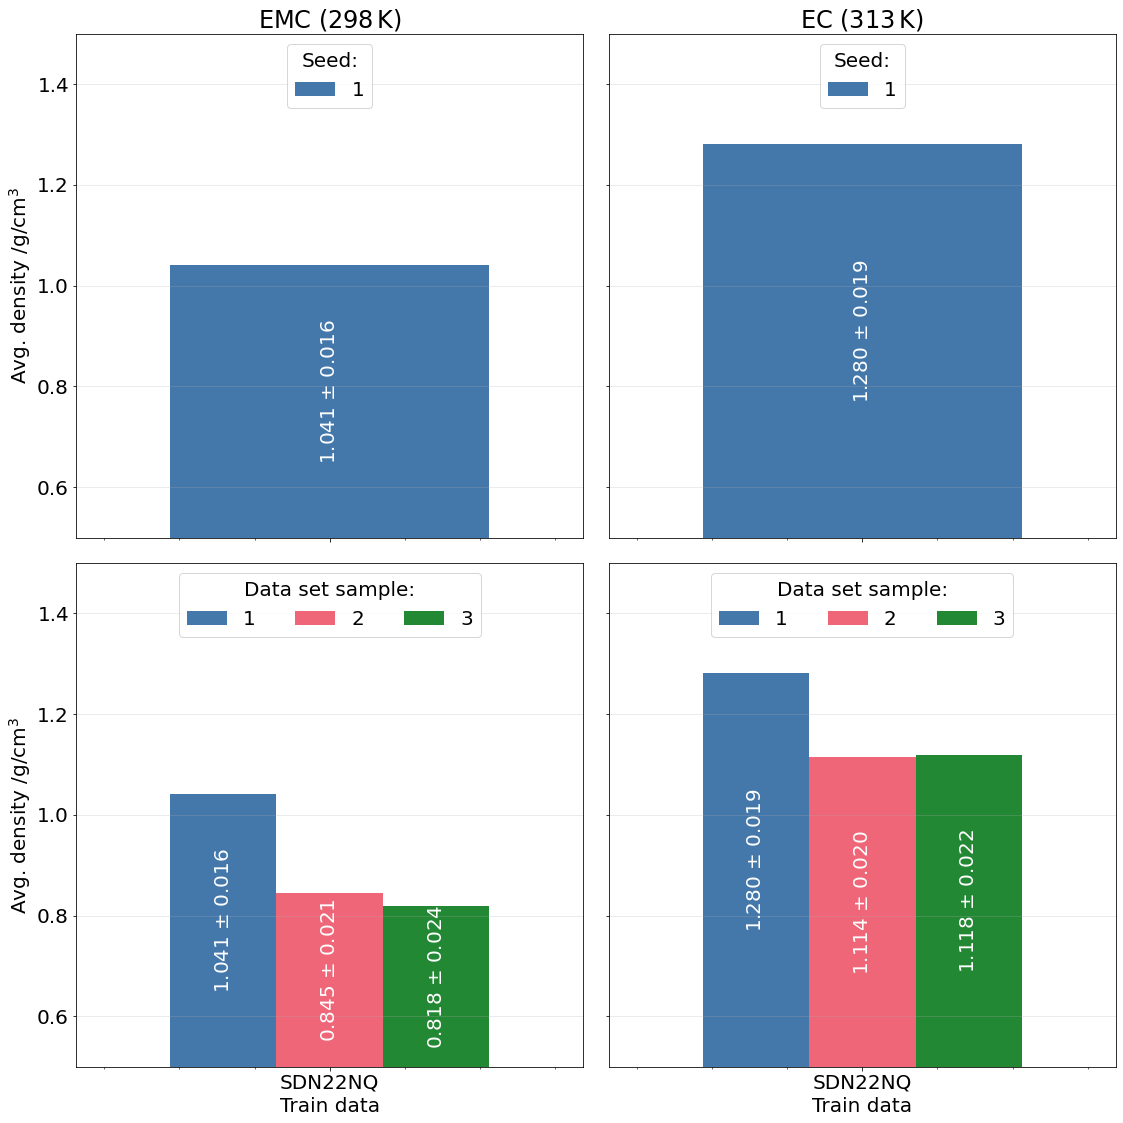

In [770]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = bf['Composition'] == comps[0]
EC_mask = bf['Composition'] == comps[-1]
EC_EMC_df = bf[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize)

    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

plt.tight_layout()

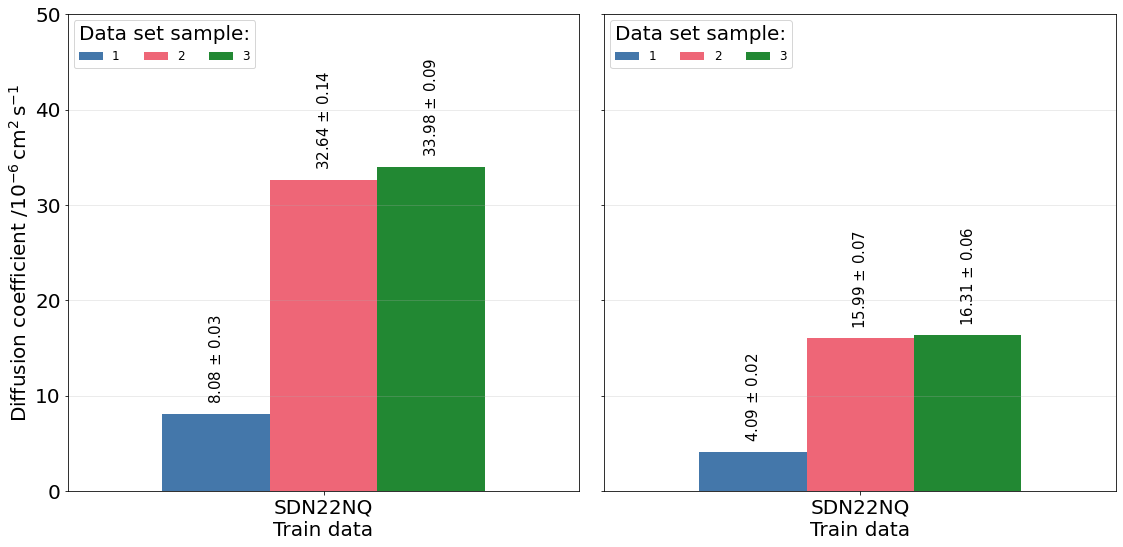

In [777]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(1,2, figsize=(8*2, 8*1), sharey='row', sharex='col')

EMC_mask = bf['Composition'] == comps[0]
EC_mask = bf['Composition'] == comps[-1]
EC_EMC_df = bf[EC_mask | EMC_mask]

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs, reversed(list(sample_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = D_g.plot.bar(
        ylim=[0,50],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper left', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.2f} $\\pm$ {e:.2f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

plt.tight_layout()

#### Comittee average

In [783]:
def reduce_df(df, drop_list):
    df = df.drop(drop_list, axis=1)
    func = df['Functional'].iloc[0]
    data = {}
    for i, (name, group) in enumerate(df.groupby('Composition')):
        dens = group['Avg. density'].mean()
        dens_err = (group['Std. density']**2).sum()**0.5/len(group)

        diff = group['Diffusion coefficient'].mean()
        diff_err = (group['Diff. fit error']**2).sum()**0.5/len(group)

        diff_start = group['Diff. start time /ns'].mean()
        tmp = {'Composition':name, 'Functional':func}
        for col in group.columns:
            try:
                if ('Std' in col) or ('error' in col):
                    tmp[col] = (group[col]**2).sum()**0.5/len(group)
                else:
                    tmp[col] = group[col].mean()
            except:
                pass
        data[i] = tmp
    dframe = pd.DataFrame.from_dict(data, orient='index')
    return dframe

In [784]:
drop_list = ['Seed', 'Sample', 'log-log r2', 'Diff. r2']
SD22NQ_B97_df = reduce_df(bf[bf['Train data'] == 'SDN22NQ'], drop_list)
SD22NQ_B97_df

,Composition,Functional,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,Diff. start time /ns
0,"EC (313$\,$K)",B97,1.171017,0.011830,12.132514,0.031090,0.086490
1,"EC:EMC (3:7) (298$\,$K)",B97,0.979340,0.011770,17.729788,0.045793,0.091690
2,"EC:EMC (7:3) (298$\,$K)",B97,1.066945,0.010709,13.192771,0.030535,0.097937
3,"EMC (298$\,$K)",B97,0.901534,0.011915,24.900054,0.056576,0.118053


## Latex tables for paper

In [785]:
def seed_density(df, composition,train_data):
    comp_mask = df['Composition'] == composition
    train_mask = df['Train data'] == train_data
    selection = df[comp_mask & train_mask]
    deviation = abs(selection['Avg. density'].min()-selection['Avg. density'].max())
    return deviation


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    'Seed pair':['SD22N', 'SD22NQ', 'SD22NQQ'],
}

for config in configs:
    SD22N_deviation = seed_density(bdf, config, 'SDN22N')
    SD22NQ_deviation = seed_density(bdf, config, 'SDN22NQ')
    SD22NQQ_deviation = seed_density(bdf, config, 'SDN22NQQ')
    data[config] = [
        SD22N_deviation,
        SD22NQ_deviation,
        SD22NQQ_deviation,
    ]
    print(f'SD22N deviations: {SD22N_deviation:.4f} g/mL')
    print(f'SD22NQ deviations: {SD22NQ_deviation:.4f} g/mL')
    print(f'SD22NQQ deviations: {SD22NQQ_deviation:.4f} g/mL\n')

seed_dens_df = pd.DataFrame(data).round(decimals=3)
print(seed_dens_df.to_latex(index=False))

SD22N deviations: 0.0908 g/mL
SD22NQ deviations: 0.1042 g/mL
SD22NQQ deviations: 0.2564 g/mL

SD22N deviations: 0.0945 g/mL
SD22NQ deviations: 0.0913 g/mL
SD22NQQ deviations: 0.2350 g/mL

SD22N deviations: 0.0913 g/mL
SD22NQ deviations: 0.0826 g/mL
SD22NQQ deviations: 0.1975 g/mL

SD22N deviations: 0.1102 g/mL
SD22NQ deviations: 0.0703 g/mL
SD22NQQ deviations: 0.1509 g/mL

\begin{tabular}{lrrrr}
\toprule
Seed pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
SD22N & 0.091000 & 0.095000 & 0.091000 & 0.110000 \\
SD22NQ & 0.104000 & 0.091000 & 0.083000 & 0.070000 \\
SD22NQQ & 0.256000 & 0.235000 & 0.198000 & 0.151000 \\
\bottomrule
\end{tabular}



In [786]:
def sample_density(df, composition,train_data):
    comp_mask = df['Composition'] == composition
    sample_mask = df['Seed'] == 1
    train_mask = df['Train data'] == train_data
    selection = df[comp_mask & train_mask]
    deviation = abs(selection['Avg. density'].min()-selection['Avg. density'].max())
    return deviation


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    #'Seed pair':['SD22NQ', 'SD22NQQ'],
    'Seed pair':['SD22NQ'],
}

for config in configs:
    #SD22N_deviation = seed_density(sample_df, config, 'SDN22N')
    SD22NQ_deviation = sample_density(bdf, config, 'SDN22NQ')
    SD22NQQ_deviation = sample_density(bdf, config, 'SDN22NQQ')
    data[config] = [
        #SD22N_deviation,
        SD22NQ_deviation,
        #SD22NQQ_deviation,
    ]
    print(config)
    #print(f'SD22N deviations: {SD22N_deviation:.4f} g/mL')
    print(f'SD22NQ deviations: {SD22NQ_deviation:.4f} g/mL')
    #print(f'SD22NQQ deviations: {SD22NQQ_deviation:.4f} g/mL\n')

seed_dens_df = pd.DataFrame(data).round(decimals=3)
#diff_df['Avg. error'] = diff_df.sum(axis=1, numeric_only=True)/len(diff_df.columns)
print(seed_dens_df.to_latex(index=False))

EMC (298$\,$K)
SD22NQ deviations: 0.1042 g/mL
EC:EMC (3:7) (298$\,$K)
SD22NQ deviations: 0.0913 g/mL
EC:EMC (7:3) (298$\,$K)
SD22NQ deviations: 0.0826 g/mL
EC (313$\,$K)
SD22NQ deviations: 0.0703 g/mL
\begin{tabular}{lrrrr}
\toprule
Seed pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
SD22NQ & 0.104000 & 0.091000 & 0.083000 & 0.070000 \\
\bottomrule
\end{tabular}



# NPT dynamics, part C

In [787]:
cf = pd.concat([SD22NQ_B97_df, SD22NQ_wB97_df])
cf

,Composition,Functional,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,Diff. start time /ns
0,"EC (313$\,$K)",B97,1.171017,0.011830,12.132514,0.031090,0.086490
1,"EC:EMC (3:7) (298$\,$K)",B97,0.979340,0.011770,17.729788,0.045793,0.091690
2,"EC:EMC (7:3) (298$\,$K)",B97,1.066945,0.010709,13.192771,0.030535,0.097937
3,"EMC (298$\,$K)",B97,0.901534,0.011915,24.900054,0.056576,0.118053
0,"EC (313$\,$K)",NaN,1.239912,0.008359,8.885928,0.012578,0.098246
1,"EC:EMC (3:7) (298$\,$K)",NaN,1.032804,0.009197,13.314410,0.023564,0.117378
2,"EC:EMC (7:3) (298$\,$K)",NaN,1.130835,0.008155,9.827120,0.013814,0.090218
3,"EMC (298$\,$K)",NaN,0.946189,0.009395,20.394952,0.036250,0.105466


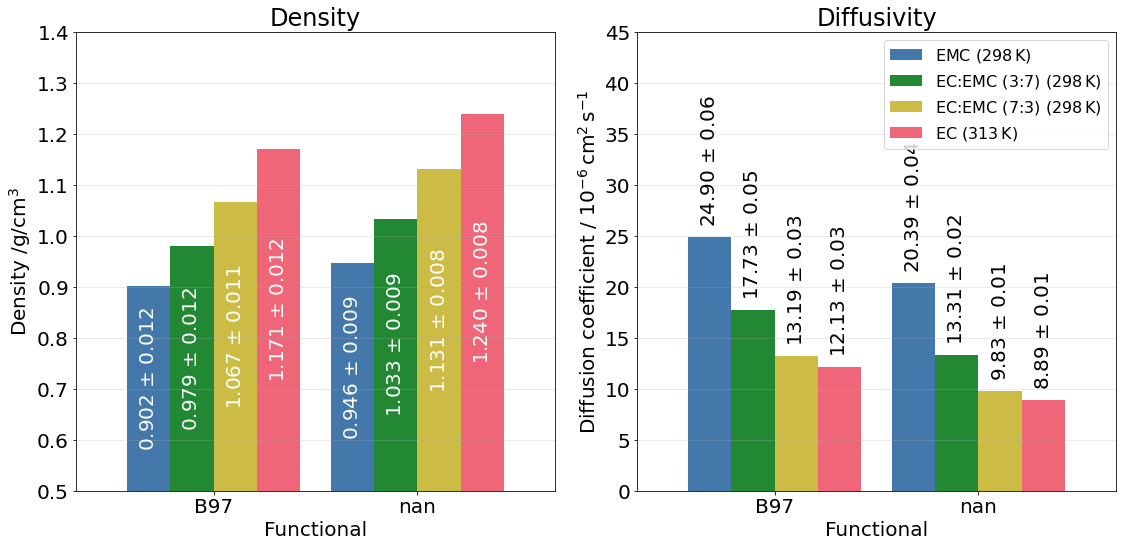

In [788]:
order = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

# Pivot tables for plotting
dens_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Avg. density',
).sort_index(axis=0,ascending=True)[order]
dens_err_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Std. density',
).sort_index(axis=0,ascending=True)[order]

diff_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Diffusion coefficient',
).sort_index(axis=0,ascending=True)[order]
diff_err_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Diff. fit error',
).sort_index(axis=0,ascending=True)[order]

fig, axs = plt.subplots(1,2, figsize=(8*2, 8*1), sharex=True, sharey=False)

a0 = dens_df.plot.bar(
    title='Density',
    ylim=[0.5,1.4],
    ylabel=f'Density /{dunit}',
    rot=0,
    width=0.85,
    color=[get_colour(o) for o in order],
    ax=axs[0],
    legend=False,
)
axs[0].grid(axis='y', alpha=0.3)
for i, c in enumerate(a0.containers):
    col_name = dens_df.columns[i]
    dens_vals = dens_df[col_name]
    dens_errors = dens_err_df[col_name]
    dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errors)]
    axs[0].bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')


a1 = diff_df.plot.bar(
    title='Diffusivity',
    ylim=[0,45],
    ylabel=f'Diffusion coefficient / $10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
    rot=0,
    width=0.85,
    color=[get_colour(o) for o in order],
    ax=axs[1],
    legend=False,
)
axs[1].grid(axis='y', alpha=0.3)
axs[1].legend(loc='upper right', fontsize=fsize-4)
for i, c in enumerate(a1.containers):
    col_name = dens_df.columns[i]
    diff_vals = diff_df[col_name]
    diff_errors = diff_err_df[col_name]
    diff_labels = [f'{v:.2f} $\\pm$ {e:.2f}' for v, e in zip(diff_vals, diff_errors)]
    axs[1].bar_label(c, rotation=90, fontsize=fsize, label_type='edge', padding=10, labels=diff_labels, color='black')

plt.tight_layout()

## Latex tables for paper

In [745]:
bf

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQ,B97,1,1,"EMC (298$\,$K)",1.040879,0.015715,8.080069,0.028090,0.676521,0.992138,0.09315
1,SDN22NQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.112943,0.015171,3.903503,0.013724,0.633109,0.991828,0.07803
2,SDN22NQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.194697,0.014892,3.626508,0.014703,0.472144,0.989232,0.08418
3,SDN22NQ,B97,1,1,"EC (313$\,$K)",1.280443,0.018938,4.092284,0.020309,0.572126,0.984380,0.10900
4,SDN22NQ,B97,1,2,"EMC (298$\,$K)",0.845267,0.021027,32.642733,0.140802,0.317597,0.988403,0.12783
5,SDN22NQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",0.919407,0.020792,20.221302,0.070562,0.673774,0.992029,0.08737
6,SDN22NQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.008562,0.018139,17.192145,0.042956,0.578577,0.995981,0.10598
7,SDN22NQ,B97,1,2,"EC (313$\,$K)",1.114161,0.020028,15.992196,0.069556,0.553276,0.987426,0.06903
8,SDN22NQ,B97,1,3,"EMC (298$\,$K)",0.818457,0.024260,33.977358,0.090515,0.628295,0.995572,0.13318
9,SDN22NQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",0.905670,0.024174,29.064560,0.117071,0.645138,0.989663,0.10967


In [746]:
def functional_density(df, functional, composition):
    comp_mask = df['Composition'] == composition
    func_mask = df['Functional'] == functional
    selection = df[comp_mask & func_mask]['Avg. density']
    #return round(selection.iloc[0], precision)
    return selection.iloc[0]


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    'Functional pair':['\BNS and \wBNS'],
}

for config in configs:
    B97_dens = functional_density(cf, 'B97', config)
    wB97_dens = functional_density(cf, 'wB97X', config)
    data[config] = [abs(B97_dens-wB97_dens)]
    print(config)
    print(f'PBED3-B97D3 diff.: {abs(B97_dens-wB97_dens):.4f} g/mL\n')

dens_df = pd.DataFrame(data).round(decimals=3)
print(dens_df.to_latex(index=False))

EMC (298$\,$K)
PBED3-B97D3 diff.: 0.0447 g/mL

EC:EMC (3:7) (298$\,$K)
PBED3-B97D3 diff.: 0.0535 g/mL

EC:EMC (7:3) (298$\,$K)
PBED3-B97D3 diff.: 0.0639 g/mL

EC (313$\,$K)
PBED3-B97D3 diff.: 0.0689 g/mL

\begin{tabular}{lrrrr}
\toprule
Functional pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
\BNS and \wBNS & 0.045000 & 0.053000 & 0.064000 & 0.069000 \\
\bottomrule
\end{tabular}



In [747]:
def functional_diffusivity(df, functional, composition):
    comp_mask = df['Composition'] == composition
    func_mask = df['Functional'] == functional
    selection = df[comp_mask & func_mask]['Diffusion coefficient']
    return selection.iloc[0]


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    'Functional pair':['\BNS and \wBNS'],
}

for config in configs:
    B97_diff = functional_diffusivity(cf, 'B97', config)
    wB97_diff = functional_diffusivity(cf, 'wB97X', config)
    data[config] = [abs(B97_diff-wB97_diff)]
    print(config)
    print(f'B97-wB97 diff.: {abs(B97_diff-wB97_diff):.4f}*1e-6 cm2/s\n')

diff_df = pd.DataFrame(data).round(decimals=3)
print(diff_df.to_latex(index=False))

EMC (298$\,$K)
B97-wB97 diff.: 4.5051*1e-6 cm2/s

EC:EMC (3:7) (298$\,$K)
B97-wB97 diff.: 4.4154*1e-6 cm2/s

EC:EMC (7:3) (298$\,$K)
B97-wB97 diff.: 3.3657*1e-6 cm2/s

EC (313$\,$K)
B97-wB97 diff.: 3.2466*1e-6 cm2/s

\begin{tabular}{lrrrr}
\toprule
Functional pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
\BNS and \wBNS & 4.505000 & 4.415000 & 3.366000 & 3.247000 \\
\bottomrule
\end{tabular}



___
# Supplementary information

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


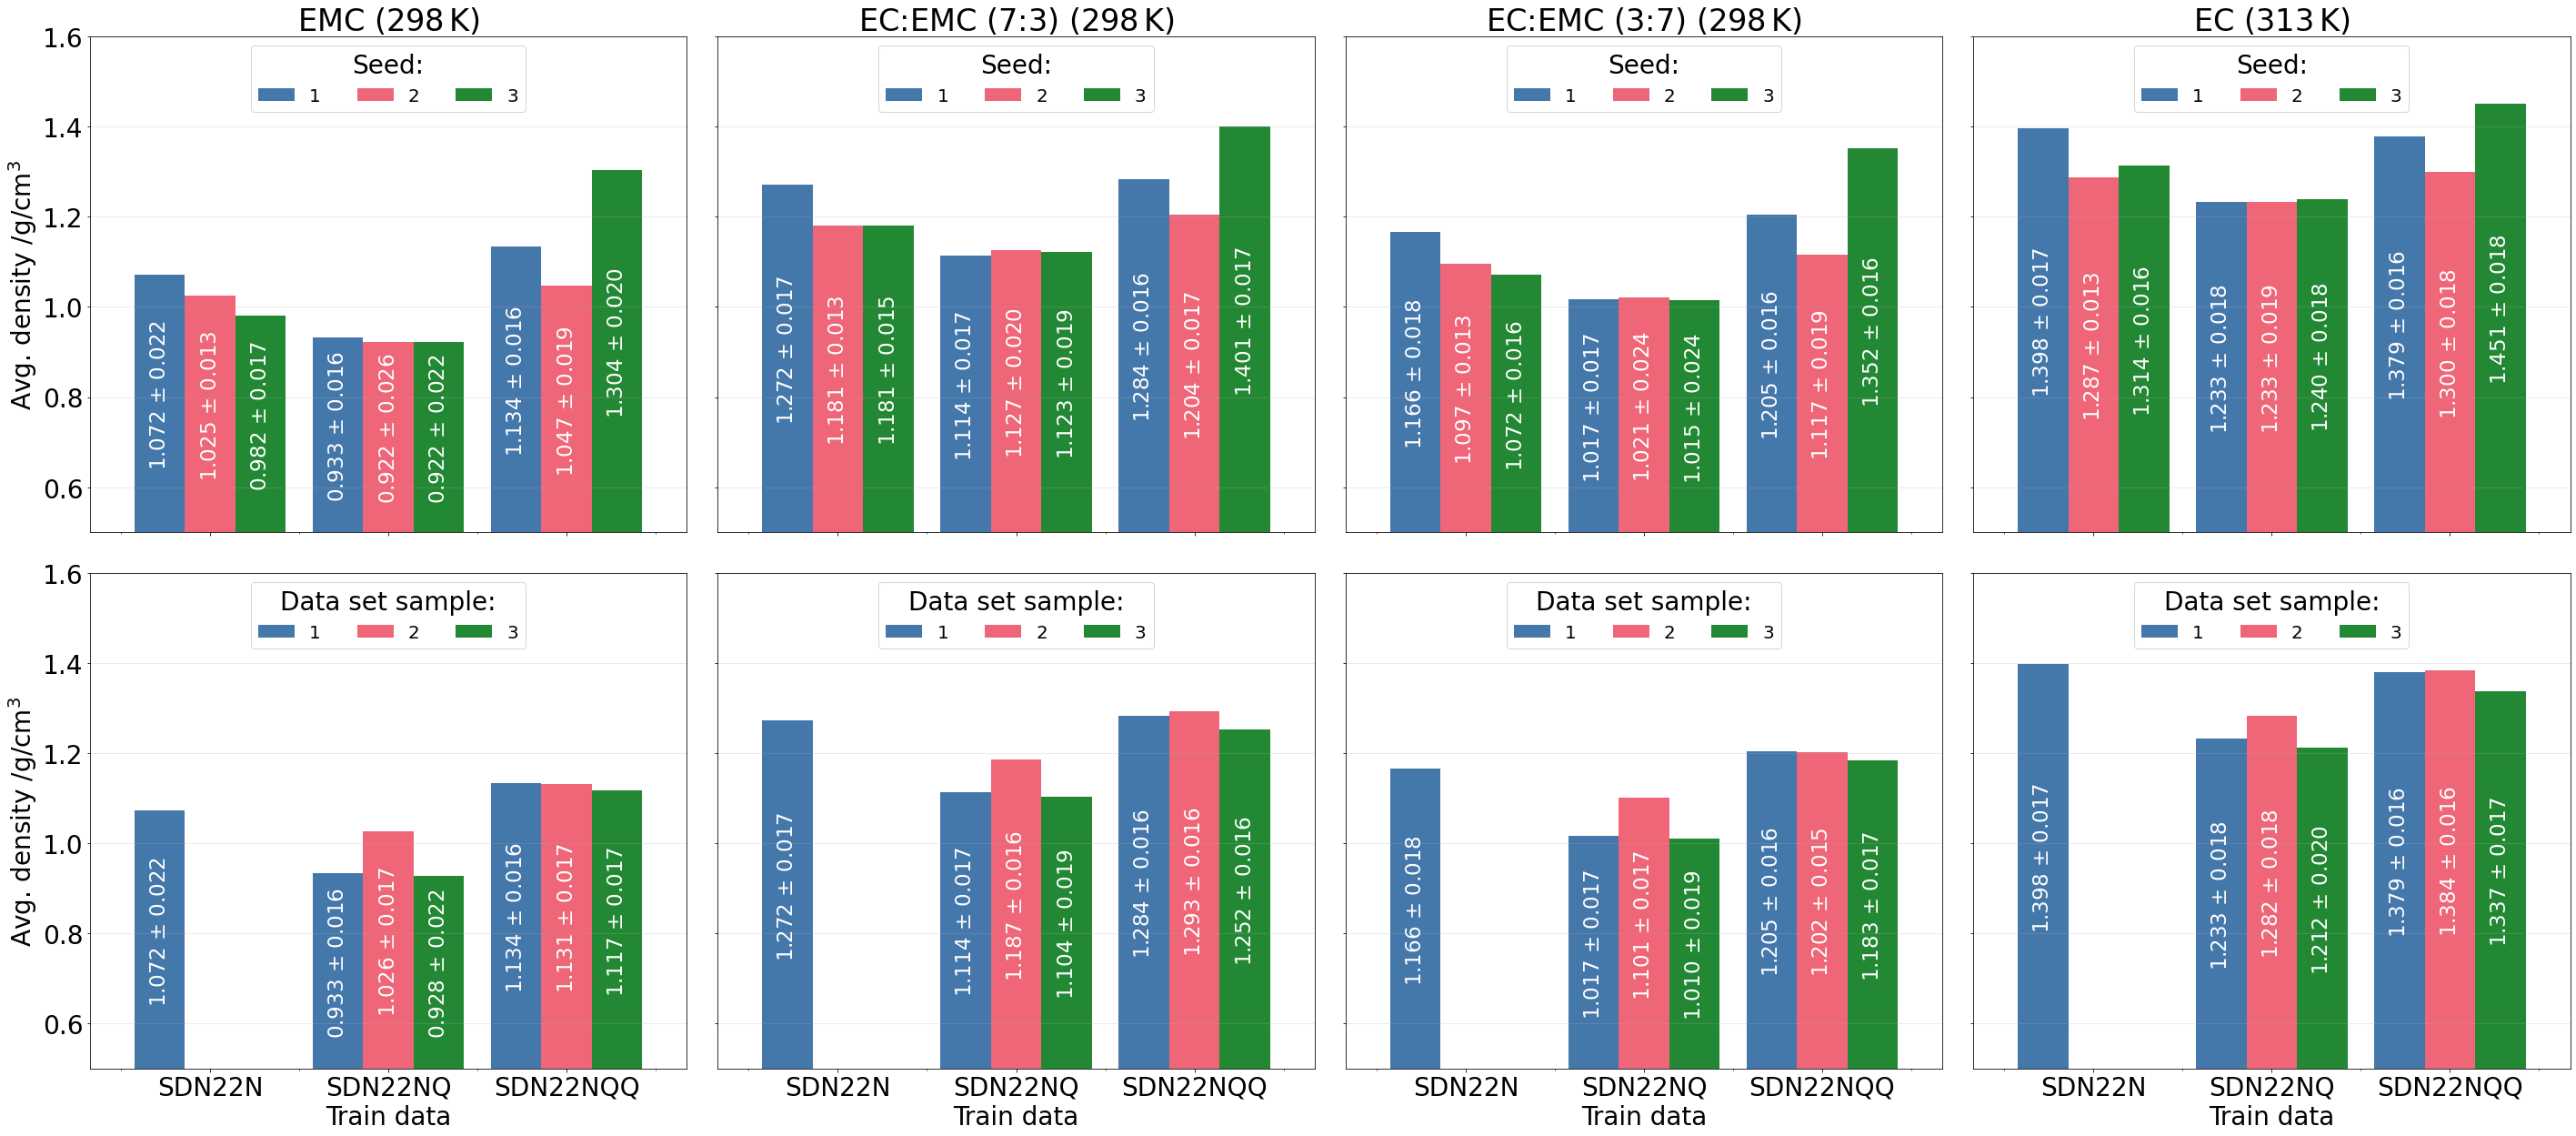

In [748]:
fsize = 28
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,4, figsize=(10*4, 9*2), sharey='row', sharex='col')


seed_df = df[df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.5,1.6],
        ylabel=f'Avg. density /{dunit}',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='center', padding=10, labels=dens_labels, color='white')


sample_df = df[df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.6],
        ylabel=f'Avg. density /{dunit}',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='center', padding=10, labels=dens_labels, color='white')

plt.tight_layout()

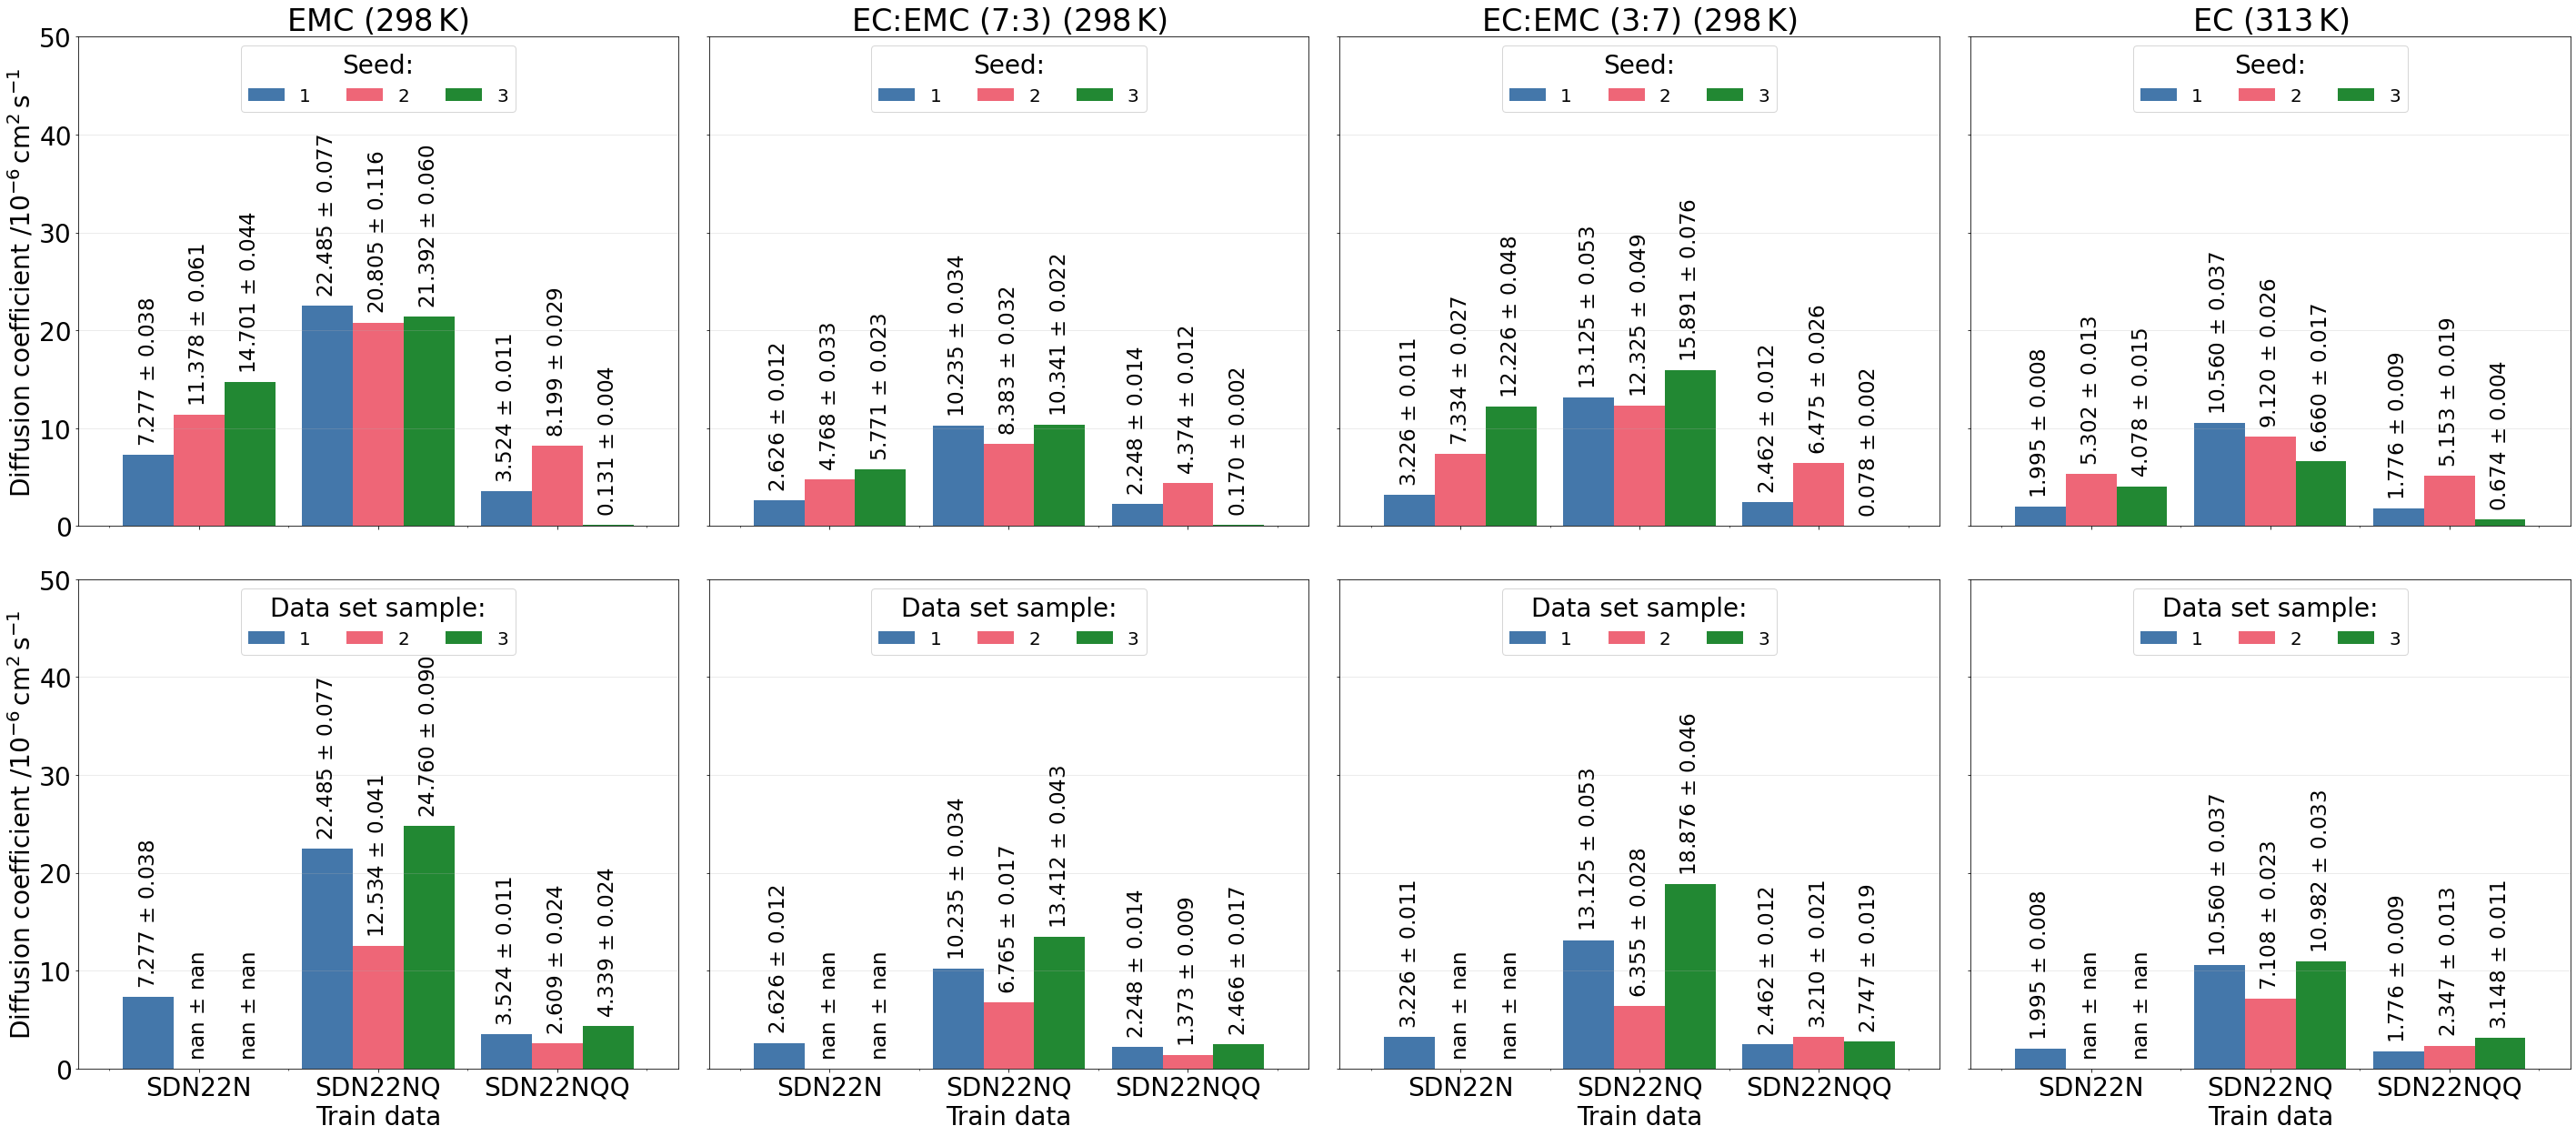

In [749]:
fsize = 28
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,4, figsize=(10*4, 9*2), sharey='row', sharex='col')


seed_df = df[df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,50],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

sample_df = df[df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = D_g.plot.bar(
        ylim=[0,50],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

plt.tight_layout()

## Checking differences between functionals
Here we compare, for each data set (using the same seed in all cases) the effect the labels has on the output.

In [750]:
recomp_tags = [
    'SDN22NQQ/B97/SEED1/DSET1',
    'SDN22NQQ/B97/SEED1/DSET2',
    'SDN22NQQ/B97/SEED1/DSET3',
    #'SDN22NQQ/B97/SEED2/DSET1', missing
    #'SDN22NQQ/B97/SEED3/DSET1', missing
    'SDN22NQ/B97/SEED1/DSET1',
    'SDN22NQ/B97/SEED1/DSET2',
    'SDN22NQ/B97/SEED1/DSET3',
    #'SDN22NQ/B97/SEED2/DSET1', missing
    #'SDN22NQ/B97/SEED3/DSET1', missing
] # These tags needs to be adjusted to be compliant with zenodo

recomp_thermo = dict()
for tag in recomp_tags:
    recomp_thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

In [751]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(recomp_thermo):
    tag = recomp_tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(recomp_thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        #idx, r2 = get_start_index(time,msd,threshold=1e-2, min_steps=5e3)
        idx, r2 = get_start_index(time,msd,threshold=5e-2, window=1000, start_id=5000)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.05
7482 99998 0.6854834062061638 3.417251393575575e-10 1.4204856636675263e-12 0.9885731617645455
Using slope error thresold of: 0.05
9217 99998 0.5173411355304183 3.1269058051833777e-10 1.9402389461989322e-12 0.9753500258300324
Using slope error thresold of: 0.05
10566 99998 0.781125653831565 3.558750109698306e-10 1.3560112711629231e-12 0.9906986502465139
Using slope error thresold of: 0.05
9580 99998 0.7027568466597301 5.718683049242095e-10 2.061416926534437e-12 0.9915763413972573
Using slope error thresold of: 0.05
8744 99999 0.7389756325363178 8.927577048122186e-10 1.9612432339009643e-12 0.9968256715317851
Using slope error thresold of: 0.05
9247 99999 0.6645205675829409 1.137980732628458e-09 2.841029527995229e-12 0.9959267091385905
Using slope error thresold of: 0.05
11032 99999 0.6707746927790418 7.924955166242179e-10 2.068310845132847e-12 0.9956373751913966
Using slope error thresold of: 0.05
8841 99999 0.42679605857996883 1.153545293536672e-09 5.

In [752]:
cf, dunit = get_density(recomp_tags, dynamics_path, std=True)
cf['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
cf['Diff. fit error'] = [e*1e10 for e in diff_errs]
cf['log-log r2'] = log_r2
cf['Diff. r2'] = diff_r2
cf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
cf.style.map(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

{'SDN22NQQ/B97/SEED1/DSET1': {'npt_000conEC_298K': 1.0972758779375589, 'npt_033conEC_298K': 1.1341481305426107, 'npt_066conEC_298K': 1.1813750304106083, 'npt_100conEC_313K': 1.2382209655993122}, 'SDN22NQQ/B97/SEED1/DSET2': {'npt_000conEC_298K': 1.0142275806258063, 'npt_033conEC_298K': 1.0550833923639236, 'npt_066conEC_298K': 1.1135255122151222, 'npt_100conEC_313K': 1.1706012561625614}, 'SDN22NQQ/B97/SEED1/DSET3': {'npt_000conEC_298K': 0.9633286659466596, 'npt_033conEC_298K': 1.0236501543615435, 'npt_066conEC_298K': 1.088814447274473, 'npt_100conEC_313K': 1.1593070867208672}, 'SDN22NQ/B97/SEED1/DSET1': {'npt_000conEC_298K': 1.040878980399412, 'npt_033conEC_298K': 1.1129425156551567, 'npt_066conEC_298K': 1.194697342603426, 'npt_100conEC_313K': 1.2804432001340025}, 'SDN22NQ/B97/SEED1/DSET2': {'npt_000conEC_298K': 0.8452666793367932, 'npt_033conEC_298K': 0.9194072432824328, 'npt_066conEC_298K': 1.0085624202442025, 'npt_100conEC_313K': 1.1141606496464966}, 'SDN22NQ/B97/SEED1/DSET3': {'npt_0

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,B97,1,1,"EMC (298$\,$K)",1.097276,0.015692,3.417251,0.014205,0.685483,0.988573,0.074820
1,SDN22NQQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.134148,0.015030,3.126906,0.019402,0.517341,0.975350,0.092170
2,SDN22NQQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.181375,0.016095,3.558750,0.013560,0.781126,0.990699,0.105660
3,SDN22NQQ,B97,1,1,"EC (313$\,$K)",1.238221,0.015759,5.718683,0.020614,0.702757,0.991576,0.095800
4,SDN22NQQ,B97,1,2,"EMC (298$\,$K)",1.014228,0.016647,8.927577,0.019612,0.738976,0.996826,0.087440
5,SDN22NQQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",1.055083,0.017535,11.379807,0.028410,0.664521,0.995927,0.092470
6,SDN22NQQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.113526,0.018982,7.924955,0.020683,0.670775,0.995637,0.110320
7,SDN22NQQ,B97,1,2,"EC (313$\,$K)",1.170601,0.019168,11.535453,0.053581,0.426796,0.985979,0.088410
8,SDN22NQQ,B97,1,3,"EMC (298$\,$K)",0.963329,0.021163,16.649799,0.052465,0.725976,0.993686,0.114930
9,SDN22NQQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",1.023650,0.021914,10.593670,0.042496,0.637195,0.989855,0.119120


In [753]:
data_mask = df['Train data'] != 'SDN22N'
seed_mask = df['Seed'] == 1

wB97_df = df[data_mask & seed_mask]

comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

ef = pd.concat([cf, wB97_df])#.reset_index()
#EMC_mask = ef['Composition'] == comps[0]
#EC_mask = ef['Composition'] == comps[-1]
#ef = ef[EC_mask | EMC_mask]
ef

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,B97,1,1,"EMC (298$\,$K)",1.097276,0.015692,3.417251,0.014205,0.685483,0.988573,0.07482
1,SDN22NQQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.134148,0.015030,3.126906,0.019402,0.517341,0.975350,0.09217
2,SDN22NQQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.181375,0.016095,3.558750,0.013560,0.781126,0.990699,0.10566
3,SDN22NQQ,B97,1,1,"EC (313$\,$K)",1.238221,0.015759,5.718683,0.020614,0.702757,0.991576,0.09580
4,SDN22NQQ,B97,1,2,"EMC (298$\,$K)",1.014228,0.016647,8.927577,0.019612,0.738976,0.996826,0.08744
5,SDN22NQQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",1.055083,0.017535,11.379807,0.028410,0.664521,0.995927,0.09247
6,SDN22NQQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.113526,0.018982,7.924955,0.020683,0.670775,0.995637,0.11032
7,SDN22NQQ,B97,1,2,"EC (313$\,$K)",1.170601,0.019168,11.535453,0.053581,0.426796,0.985979,0.08841
8,SDN22NQQ,B97,1,3,"EMC (298$\,$K)",0.963329,0.021163,16.649799,0.052465,0.725976,0.993686,0.11493
9,SDN22NQQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",1.023650,0.021914,10.593670,0.042496,0.637195,0.989855,0.11912


### SD22NQQ
#### Density

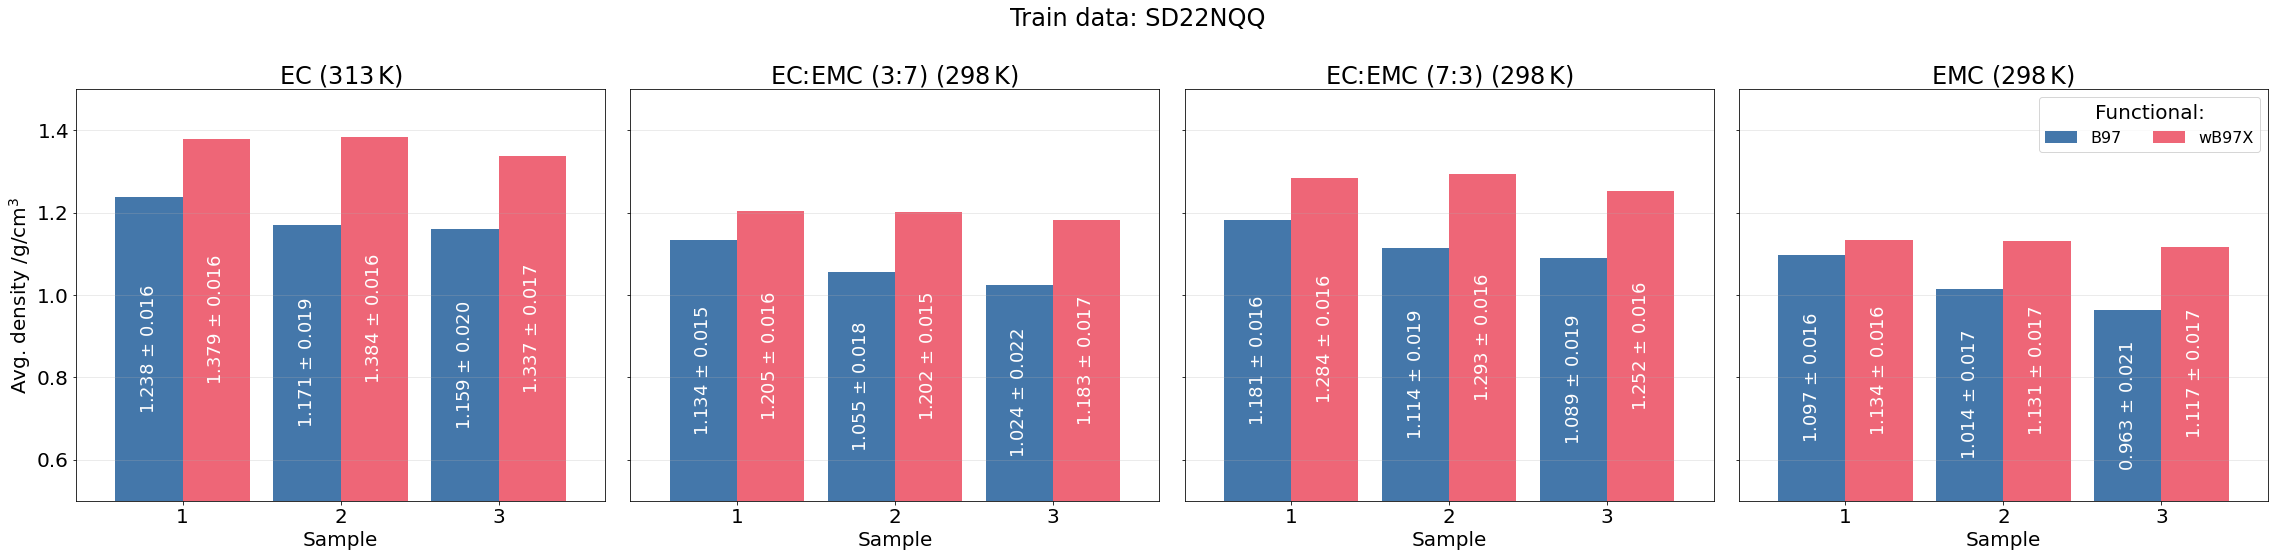

In [754]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQQ_functional_comp = ef[ef['Train data'] == 'SDN22NQQ']

fig.suptitle('Train data: SD22NQQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQQ_functional_comp.groupby('Composition')):
    ax.set_title(n)
    avg_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Avg. density',
    ).sort_index(axis=0,ascending=True)#[order]
    std_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Std. density',
    ).sort_index(axis=0,ascending=True)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset,
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-2, label_type='center', padding=0, labels=dens_labels, color='white')

axs[-1].legend(title='Functional:', ncols=3, loc='upper right', fontsize=fsize-4)
plt.tight_layout()

#### Diffusivity

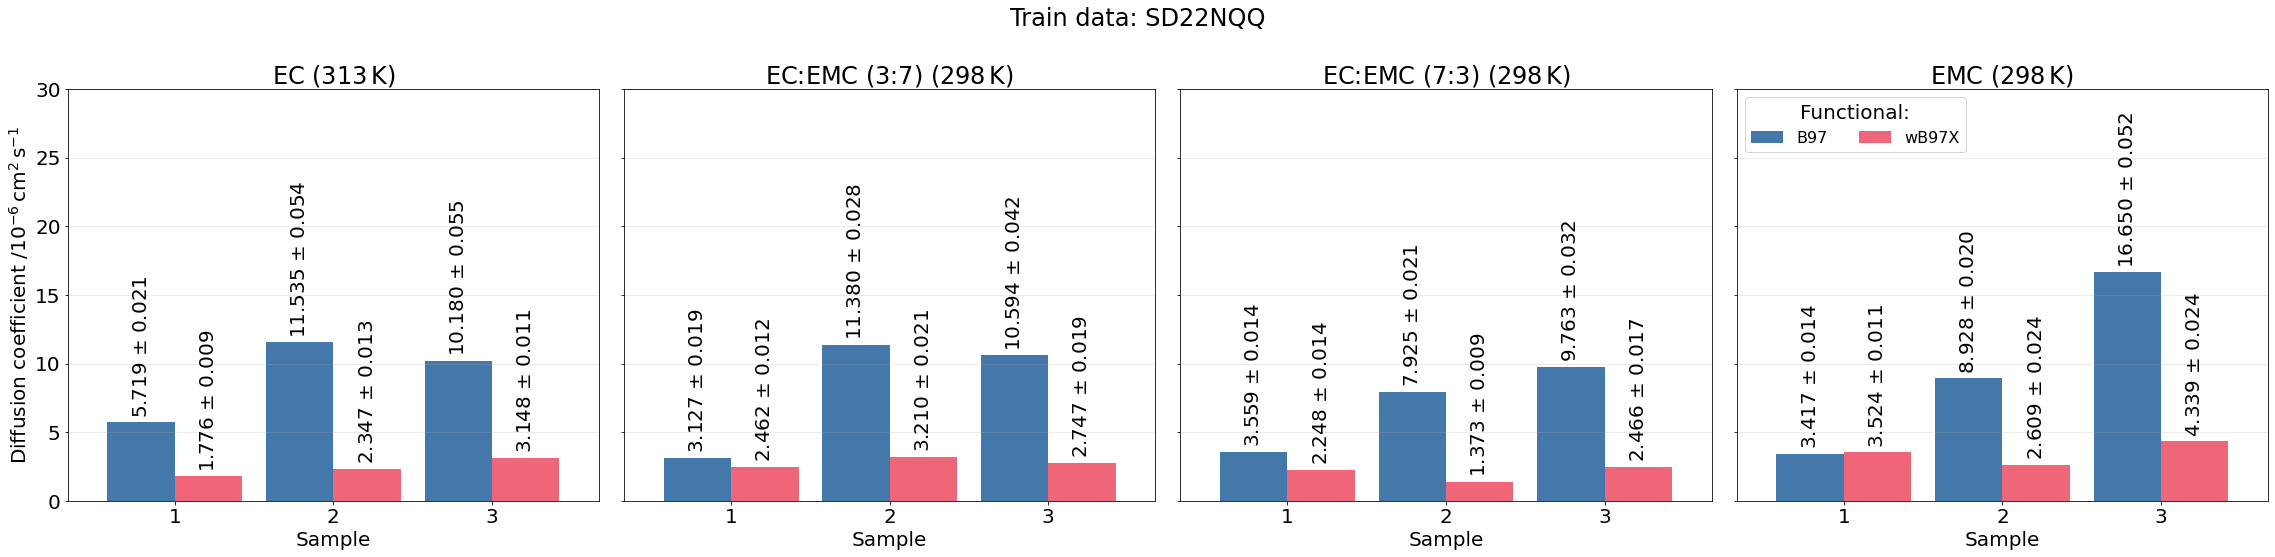

In [755]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQQ_functional_comp = ef[ef['Train data'] == 'SDN22NQQ']

fig.suptitle('Train data: SD22NQQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQQ_functional_comp.groupby('Composition')):
    D_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=True)#[order]
    err_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=True)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,30],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='edge', padding=5, labels=diff_labels, color='black')

axs[-1].legend(title='Functional:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()

### SD22NQ
#### Density

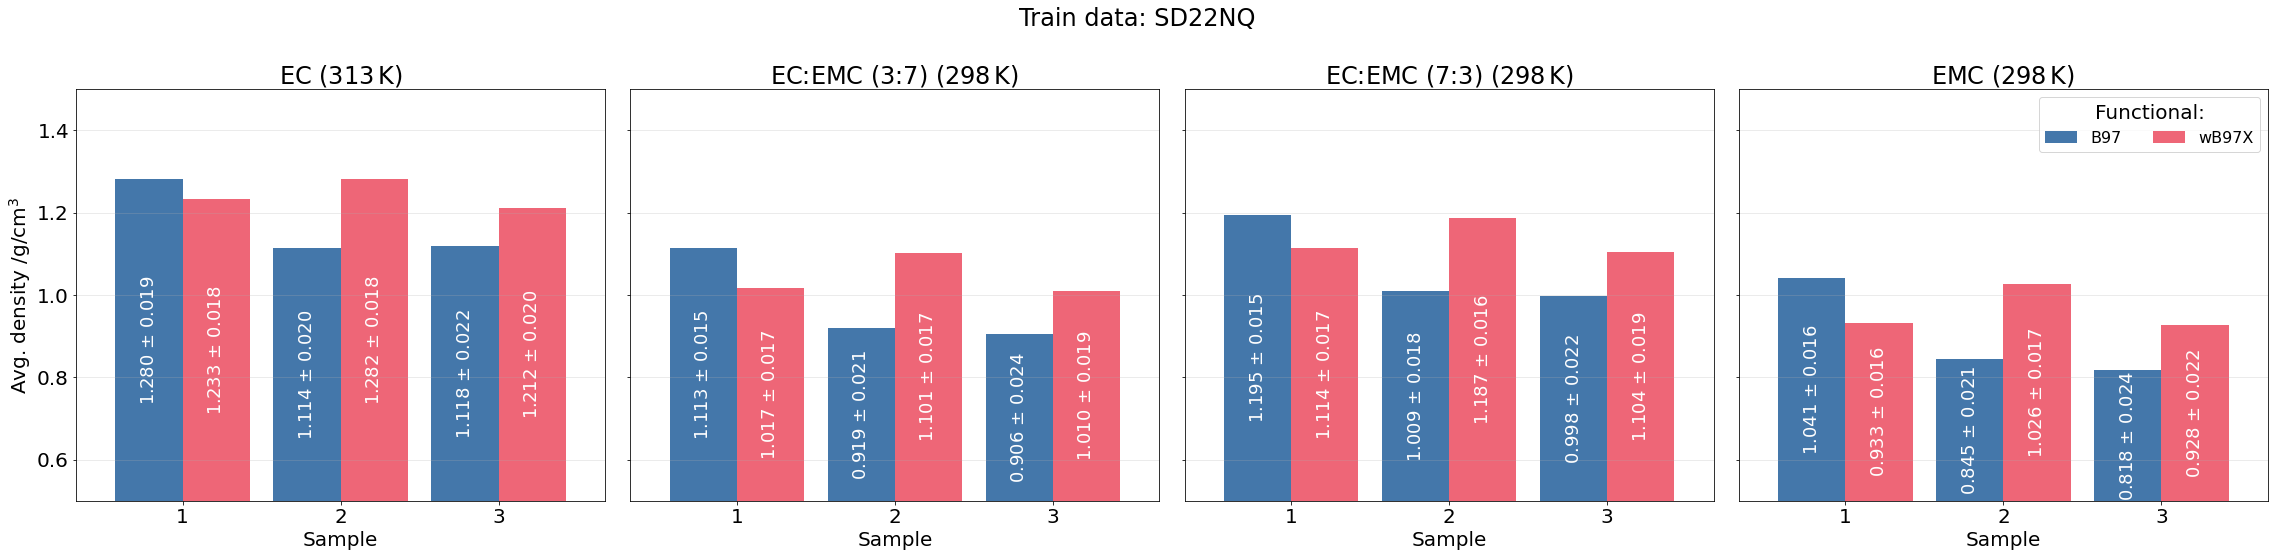

In [756]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQ_functional_comp = ef[ef['Train data'] == 'SDN22NQ']

fig.suptitle('Train data: SD22NQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQ_functional_comp.groupby('Composition')):
    ax.set_title(n)
    avg_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Avg. density',
    ).sort_index(axis=0,ascending=True)#[order]
    std_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Std. density',
    ).sort_index(axis=0,ascending=True)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset,
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-2, label_type='center', padding=0, labels=dens_labels, color='white')

axs[-1].legend(title='Functional:', ncols=3, loc='upper right', fontsize=fsize-4)
plt.tight_layout()

#### Diffusivity

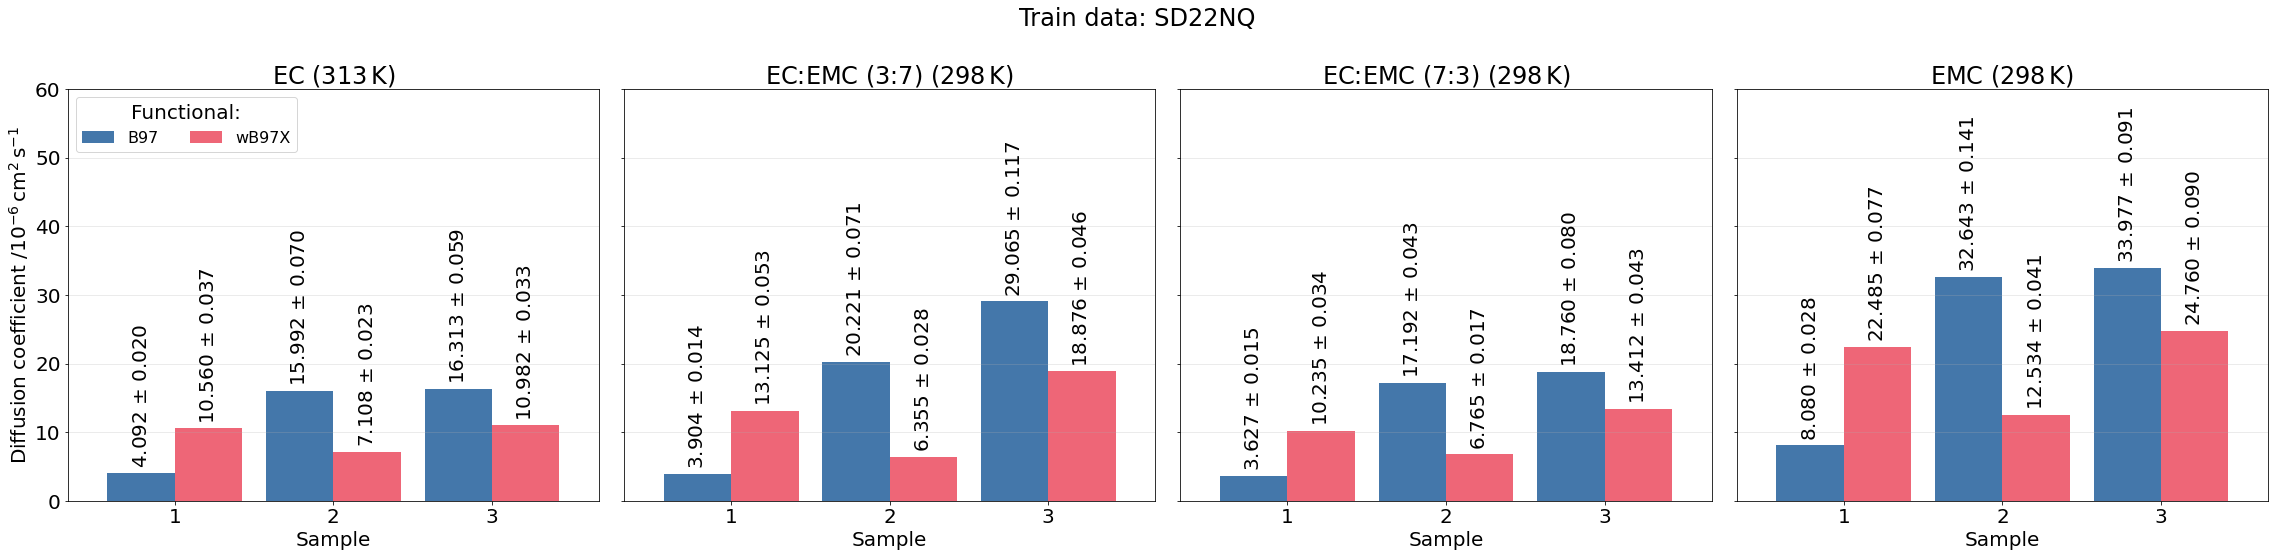

In [757]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQ_functional_comp = ef[ef['Train data'] == 'SDN22NQ']

fig.suptitle('Train data: SD22NQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQ_functional_comp.groupby('Composition')):
    D_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=True)#[order]
    err_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=True)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,60],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='edge', padding=5, labels=diff_labels, color='black')

axs[0].legend(title='Functional:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()